In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
import math
from scipy.misc import imsave
from scipy.misc import imread
import pandas as pd
import glob, os
################################################
# Read frames which have been data-cleaned (wire_particle_tracking_datacleaning). 
################################################
shot = 232
picL = 18333
picR = 18158
BR = [[5.7149E-08,1.1882E-05,-2.4321E-03],[8.8831E-06,-5.3566E-07,-3.8744E-02],[-1.6469E-03,3.3774E-02,9.9867E-01]]
TR = [[-5.7704E-08,1.1998E-05,-2.1514E-03],[8.9694E-06,5.4087E-07,-3.9328E-02],[-1.7813E-03,3.3894E-02,9.9865E-01]]
TL = [[1.1040E-07,2.2954E-05,-4.1584E-03],[1.7160E-05,-1.0348E-06,6.8654E-02],[-3.4505E-03,-7.3661E-02,9.9490E-01]]
BL = [[-1.0175E-07,2.1155E-05,-4.2910E-03],[1.5815E-05,9.5369E-07,6.2907E-02],[-2.8931E-03,-6.8254E-02,9.9567E-01]]
F_10point = [[  8.34360564e-08,   1.89022714e-05,  -3.73041652e-03],[  1.94501963e-05,   1.19512678e-06,  -5.90813947e-02],[ -3.16737708e-03,   5.30589622e-02,   9.96830069e-01]]
F_big = [[  1.75345969e-07,   1.87353876e-05,  -3.69560210e-03], [  1.92508173e-05,   9.79548859e-07,  -5.72239187e-02],[ -3.15390413e-03,   5.12220927e-02,   9.97034661e-01]]
F_10point_2 = [[  5.59273094e-07,  -6.08650734e-06,   2.05586754e-03], [  7.17519639e-06,   1.44074201e-06,  -7.14172969e-03],[ -3.18532599e-03,   4.59309570e-03,   9.99956762e-01]]
#F = F_10point_2
F = F_big
Matr = F
MatrixL = np.array(Matr)
MatrixR = MatrixL.transpose()
v0L = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL_sum.tif'.format(shot,shot,picL))
v0R = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR_sum.tif'.format(shot,shot,picR))
bk0L = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL0.tif'.format(shot,shot,picL))
bk0R = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR0.tif'.format(shot,shot,picR))
height,width = bk0L.shape
print(width,height)
Linex = np.arange(0,width,1)

(384, 384)


In [17]:
trackR = pd.read_csv("./Data/Shot{}/trackR3_frame_inv.csv".format(shot))
trackL = pd.read_csv("./Data/Shot{}/trackL3_frame_inv.csv".format(shot))
trackR['InvFrame'] = 6773-trackR['frame']
trackL['InvFrame'] = 6773-trackL['frame']
trackR.head()
#pair = pd.read_csv("PairList.csv") 
#for iL in pair['PIDL'].unique():

#    for iR in pair1['PIDR'].unique():

,frame,diag_remembered,diag_search_range,diag_subnet,diag_subnet_iterations,diag_subnet_size,ecc,ep,frame.1,mass,particle,raw_mass,signal,size,x,y,range,InvFrame
0,0,NaN,NaN,NaN,NaN,NaN,0.383013,0.000317,0,184.147963,0.0,457.0,53.421764,0.842554,141.918089,78.879408,131.223595,6773
1,0,NaN,NaN,NaN,NaN,NaN,0.346442,0.000418,0,150.628425,17.0,347.0,38.756966,0.861799,86.942976,282.948540,154.310801,6773
2,1,NaN,3.0,NaN,NaN,NaN,0.384491,0.000321,1,179.520687,0.0,448.0,52.377317,0.841569,141.921053,78.881007,131.223595,6772
3,1,NaN,3.0,NaN,NaN,NaN,0.344954,0.000413,1,150.764513,17.0,348.0,38.820835,0.861688,86.937330,282.946866,154.310801,6772
4,2,NaN,3.0,NaN,NaN,NaN,0.385113,0.000223,2,178.049238,0.0,446.0,51.862966,0.841852,141.920872,78.881881,131.223595,6771


In [4]:
#os.chdir(".")
#results = pd.DataFrame([])
'''
for counter, file in enumerate(glob.glob("./Data/Shot{}/Pair_*.csv".format(shot))):    
    f1 = file.split('.csv')
    f2 = f1[0].split('_')    
    df = pd.read_csv(file)
    plt.figure(figsize = (24,24))  # make a new figure
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    ax2.imshow(v0L+bk0L)
    ax2.scatter(df['XL'],df['YL'],color='r',marker=".",s=1)
    #ax2.plot(df['XR'],df['YR'],color='y')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax4.imshow(v0R+bk0R)
    #ax4.plot(df['XL'],df['YL'],color='r')
    ax4.scatter(df['XR'],df['YR'],color='y',marker=".",s=1)
    ax4.set_xlabel('x')
    ax4.set_ylabel('y')
    ax1.scatter(df['Frame'],df['MassL'],color='r',marker=".",s=1)
    ax1.scatter(df['Frame'],df['MassR'],color='y',marker=".",s=1)
    ax1.set_xlabel('Frame')
    ax1.set_ylabel('Mass')
    ax3.scatter(df['Frame'],df['DistanceL'],color='r',marker=".",s=1)
    ax3.scatter(df['Frame'],df['DistanceR'],color='y',marker=".",s=1)
    ax3.set_xlabel('Frame')
    ax3.set_ylabel('FF')
    plt.savefig('./Data/Shot{}/Pair_{}.pdf'.format(shot,f2[1]))
'''

'\nfor counter, file in enumerate(glob.glob("./Data/Shot{}/Pair_*.csv".format(shot))):    \n    f1 = file.split(\'.csv\')\n    f2 = f1[0].split(\'_\')    \n    df = pd.read_csv(file)\n    plt.figure(figsize = (24,24))  # make a new figure\n    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)\n    ax2.imshow(v0L+bk0L)\n    ax2.scatter(df[\'XL\'],df[\'YL\'],color=\'r\',marker=".",s=1)\n    #ax2.plot(df[\'XR\'],df[\'YR\'],color=\'y\')\n    ax2.set_xlabel(\'x\')\n    ax2.set_ylabel(\'y\')\n    ax4.imshow(v0R+bk0R)\n    #ax4.plot(df[\'XL\'],df[\'YL\'],color=\'r\')\n    ax4.scatter(df[\'XR\'],df[\'YR\'],color=\'y\',marker=".",s=1)\n    ax4.set_xlabel(\'x\')\n    ax4.set_ylabel(\'y\')\n    ax1.scatter(df[\'Frame\'],df[\'MassL\'],color=\'r\',marker=".",s=1)\n    ax1.scatter(df[\'Frame\'],df[\'MassR\'],color=\'y\',marker=".",s=1)\n    ax1.set_xlabel(\'Frame\')\n    ax1.set_ylabel(\'Mass\')\n    ax3.scatter(df[\'Frame\'],df[\'DistanceL\'],color=\'r\',marker=".",s=1)\n    ax3.scatter(df[\'Frame\'

In [5]:
for counter, file in enumerate(glob.glob("./Data/Shot{}/Pair_*.csv".format(shot))):    
    f1 = file.split('.csv')
    f2 = f1[0].split('_')    
    iL = int(f2[1])
    df = pd.read_csv(file)
    for iR in df['PIDR'].unique():
        print(iL,iR)
        df1 = df[df['PIDR']==iR]
        tL = trackL[trackL['particle']==iL]
        tR = trackR[trackR['particle']==iR]
        plt.figure(figsize = (24,24))  # make a new figure
        f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
        ax2.imshow(v0L+bk0L)
        ax2.scatter(tL['x'],tL['y'],color='r',marker=".",s=1)
        #ax2.plot(df['XR'],df['YR'],color='y')
        ax2.set_xlabel('x')
        ax2.set_ylabel('y')
        ax4.imshow(v0R+bk0R)
        #ax4.plot(df['XL'],df['YL'],color='r')
        ax4.scatter(tR['x'],tR['y'],color='y',marker=".",s=1)
        ax4.set_xlabel('x')
        ax4.set_ylabel('y')
        ax1.scatter(tL['InvFrame'],tL['mass'],color='r',marker=".",s=1)
        ax1.scatter(tR['InvFrame'],tR['mass'],color='y',marker=".",s=1)
        ax1.set_xlabel('Frame')
        ax1.set_ylabel('Brightnewss')
        ax3.scatter(df1['Frame'],df1['DistanceL'],color='r',marker=".",s=1)
        ax3.scatter(df1['Frame'],df1['DistanceR'],color='y',marker=".",s=1)
        ax3.set_xlabel('Frame')
        ax3.set_ylabel('Epipolar Distance')
        plt.savefig('./Data/Shot{}/Pair_{}_{}.pdf'.format(shot,iL,iR))
        #df1.to_csv('./Data/Shot{}/Pair_{}_{}.csv'.format(shot,iL,iR))


IndentationError: unexpected indent (<ipython-input-5-a86e4e34357f>, line 10)

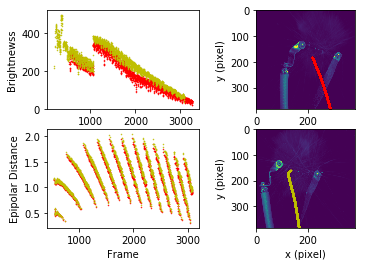

In [18]:
#os.chdir(".")
#results = pd.DataFrame([])
indexL = 4946
indexR = 3384
file = "./Data/Shot{}/TrackPair/Pair_{}_{}.csv".format(shot,indexL,indexR)
#for counter, file in enumerate(glob.glob("./Data/Shot{}/Pair_*.csv".format(shot))):    
    #f1 = file.split('.csv')
    #f2 = f1[0].split('_')    
    #iL = int(f2[1])
df = pd.read_csv(file)
df['InvFrame'] = 6773-df['Frame']
    #for iR in df['PIDR'].unique():
    #    print(iL,iR)
iL = indexL
iR = indexR
df1 = df[df['PIDR']==iR]
tL = trackL[trackL['particle']==iL]
tR = trackR[trackR['particle']==iR]
plt.figure(figsize = (24,24))  # make a new figure
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax2.imshow(v0L+bk0L)
ax2.scatter(tL['x'],tL['y'],color='r',marker=".",s=1)
        #ax2.plot(df['XR'],df['YR'],color='y')
#ax2.set_xlabel('x')
ax2.set_ylabel('y (pixel)')
ax4.imshow(v0R+bk0R)
        #ax4.plot(df['XL'],df['YL'],color='r')
ax4.scatter(tR['x'],tR['y'],color='y',marker=".",s=1)
ax4.set_xlabel('x (pixel)')
ax4.set_ylabel('y (pixel)')
ax1.scatter(tL['InvFrame'],tL['mass'],color='r',marker=".",s=1)
ax1.scatter(tR['InvFrame'],tR['mass'],color='y',marker=".",s=1)
#ax1.set_xlabel('Frame')
ax1.set_ylabel('Brightnewss')
ax3.scatter(df1['InvFrame'],df1['DistanceL'],color='r',marker=".",s=1)
ax3.scatter(df1['InvFrame'],df1['DistanceR'],color='y',marker=".",s=1)
ax3.set_xlabel('Frame')
ax3.set_ylabel('Epipolar Distance')
plt.savefig('./Data/Shot{}/Pair_{}_{}.pdf'.format(shot,iL,iR))
plt.show()
